# All Sites Plots 2

* trying to make some 3d snow depth plots for the WADNR report figures 

created by Cassie Lumbrazo\
date: July 2023\
python environment: **raster**


In [2]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr

import copy 
import pickle

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
ds_ce = xr.open_dataset('/home/lumbraca/raster/data/cer_model_cleandata_create_netcdf.nc')
ds_sr = xr.open_dataset('/home/lumbraca/raster/data/sr_model_cleandata_create_netcdf.nc')
ds_fl = xr.open_dataset('/home/lumbraca/raster/data/fl_model_cleandata_create_netcdf.nc')

In [ ]:
# dem = gdal.Open("/home/lumbraca/raster/data/NCALM/SOUT_GEG_03F.tif")

In [5]:
X=ds_ce.x
Y=ds_ce.y
Z=ds_ce.dem

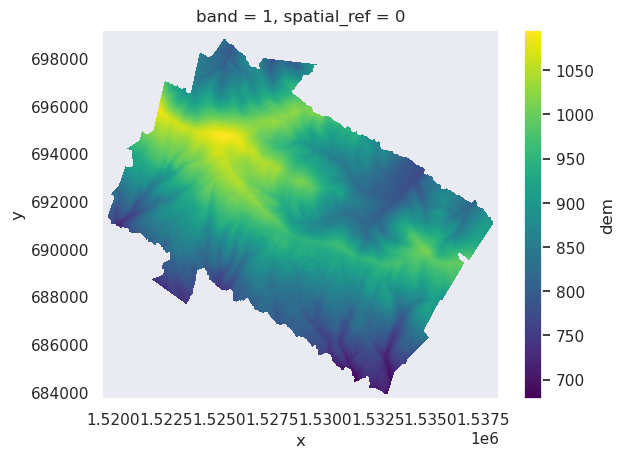

In [77]:
ds_ce.dem.plot()

In [6]:
X, Y = np.meshgrid(X, Y)

In [8]:
X.shape

(5168, 6248)

In [11]:
dem_values = ds_ce.dem.values

In [12]:
dem_values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [18]:
ds_ce.x

<xarray.DataArray 'x' (x: 6248)>
array([1519492.67, 1519495.67, 1519498.67, ..., 1538227.67, 1538230.67,
       1538233.67])
Coordinates:
  * x            (x) float64 1.519e+06 1.519e+06 ... 1.538e+06 1.538e+06
    spatial_ref  int32 ...

In [19]:
xr.DataArray(dem_values, dims={'x':ds_ce.x, 'y':ds_ce.y})

ValueError: different number of dimensions on data and dims: 3 vs 2

In [61]:
X.shape

(5168, 6248)

In [68]:
Y.shape

(5168, 6248)

In [106]:
Z.shape

(1, 5168, 6248)

ValueError: Argument Z must be 2-dimensional.

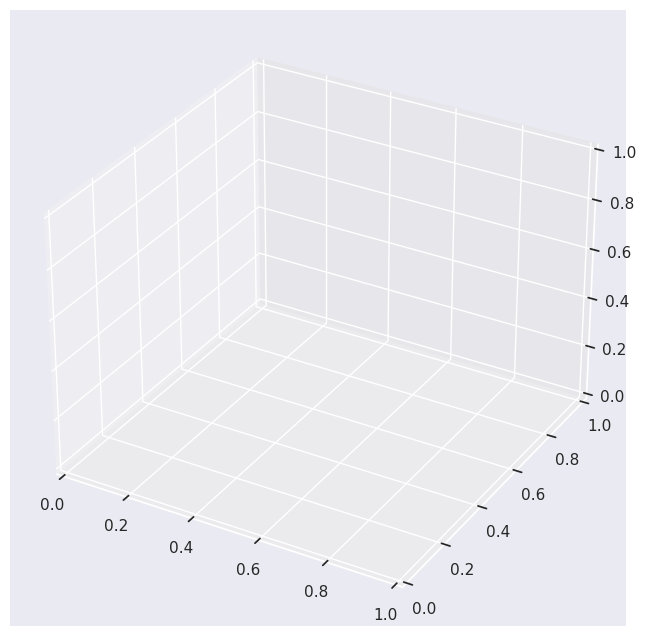

In [40]:
fig, ax = plt.subplots(figsize=(16,8), subplot_kw={'projection': '3d'})
ax.plot_surface(X=ds_ce.x.values, Y=ds_ce.y.values, Z=Z, antialiased=True)

# gt  = ds_ce.dem.GetGeoTransform()
# dem = ds_ce.dem.ReadAsArray()

xres = gt[1]
yres = gt[5]

X = np.arange(gt[0], gt[0] + dem.shape[1]*xres, xres)
Y = np.arange(gt[3], gt[3] + dem.shape[0]*yres, yres)

X, Y = np.meshgrid(X, Y)

ax.plot_surface(X, Y, Z.values, antialiased=True)

In [57]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = go.Figure(data=[go.Surface(z=ds_ce.dem.values)])

# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()